# Zika Analysis

## What is this, where am I?

This is an jupyter-notebook, an interactive programming environment for python. It consists of cells like this, which contain text, images, or executable code.

You can proceed through each cell by selecting it and pressing `Ctrl + Enter` or by clicking on the `Play` button in the menu bar. This notebook comes with "batteries included", which means it contains some example data and functions we have prepared in advance.

You don't need to know how to program in order to participate and to use this notebook. If you already know some python, please feel free to modify, change and experiment with the code and data.

You find all necessary informations on our central [FutureTDM GitHub repository](https://github.com/ContentMine/FutureTDM).

## What are we going to do?

Here the analysis of the [zika virus tutorial](https://github.com/ContentMine/FutureTDM/tutorials/zika) will be done. After we did before the download of the publications, and extracted all facts we are interested in, we now can have a look on the data and try to find some interesting results. We will look on the frequency and the co-occurence of facts in the corpus.

## Set up your environment
Import the prepared python functions into the notebook. Hackers and anyone who want to look under the hood can find the prepared functions in the resources folder, and the dataset in the trialsjournal folder.

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from pycproject.readctree import CProject
from pycproject.factnet import *
import os
from collections import Counter

%matplotlib inline

### Reading in the dataset

In the next cell we read in the prepared data, which is located in the trialsjournal folder, into the notebook and assign it to the TRIALS variable. This data contains the results from executing the ContentMine tool chain. Each CProject itself contains many `CTrees`, one for each publication, which are the building blocks of our dataset.

In [49]:
zika = CProject("", "zika") # empty path value means we are already in the root directory
zika.size

1126

## Get the word frequencies

In [50]:
words = Counter()
for ctree in zika.get_ctrees():
    if 'word' in ctree.results:
        for word in ctree.results['word']['frequencies']:
            words.update({word['word'], int(word['count'])})
#print(words)

Print the 20 most common terms in the papers in decreasing order.

In [51]:
for word, count in words.most_common(20):
    print(word, count)

4 68231
5 44228
6 27214
7 19432
8 15817
9 10508
10 8349
11 6664
12 5454
13 4481
14 3776
17 3452
18 3189
15 3107
16 2717
20 2711
21 2492
29 1778
19 1770
22 1339


Plot the frequencies as a histogram.

In [52]:
frequ = [value for key, value in words.most_common()[500:]]

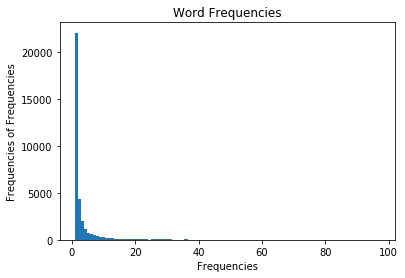

In [53]:
plt.hist(frequ, bins=100)
plt.title("Word Frequencies")
plt.xlabel("Frequencies")
plt.ylabel("Frequencies of Frequencies")
plt.show()

## Let's dive into the data!

First we create a network between papers and entities such as genes or genus. In this network a node is either a unique identifier of a paper, or the name of the entity. An edge or link between nodes is created when a paper mentions an entity. The entities have been identified through the [ami-plugins](https://github.com/ContentMine/ami/).

### Choose the type of entity
Uncomment the type of entity you want to take a look at: "person", "organization" or "location". 
Be aware: This will be your entity type for the rest of the hacking session.

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.4/dist-packages/matplotlib/pyplot.py'>

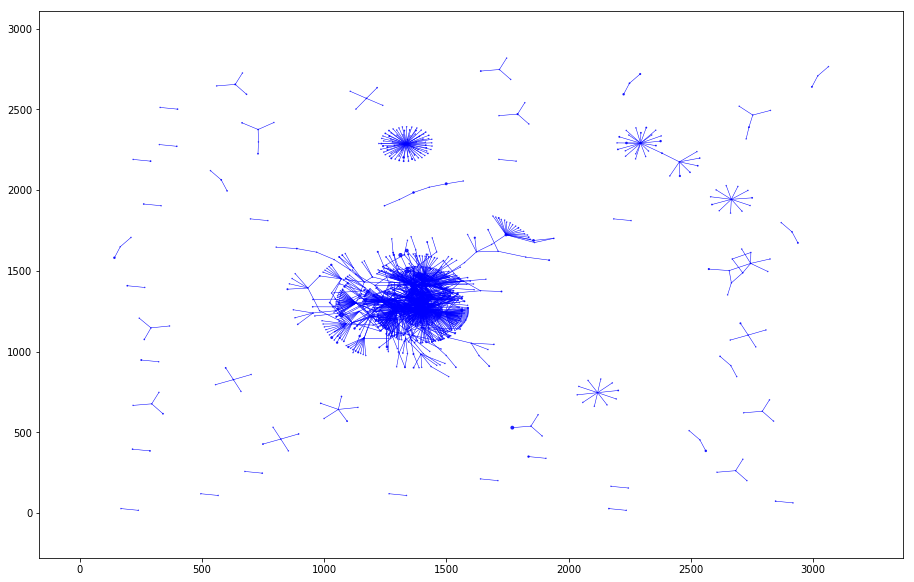

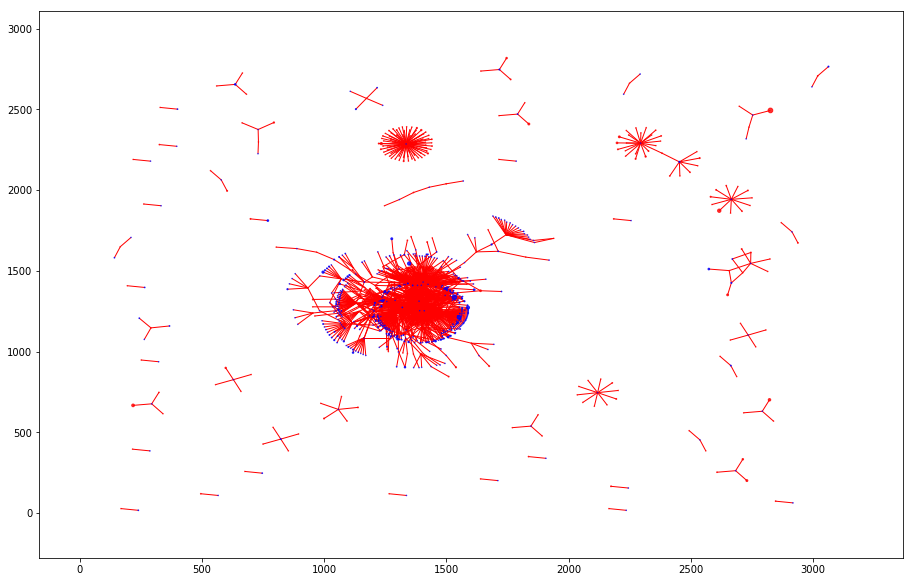

In [54]:
B_genus, fact_graph, paper_graph, fact_nodes, paper_nodes = create_network(zika, "species", "genus")
plotGraph(B_genus)
plotBipartiteGraph(B_genus)

In [55]:
start_with = 0 # enter a number here
how_many = 10 # # this will give us the next 10
degreeCent = nx.algorithms.degree_centrality(B_genus)
for node in sorted(degreeCent, key=degreeCent.get, reverse=True)[start_with:start_with+how_many]:
    print(node, len(B_genus.neighbors(node)))

Aedes 290
Flavivirus 109
Flaviviridae 100
Culex 76
Vascular plant biodiversity of the lower Coppermine River valley and vicinity (Nunavut, Canada): an annotated checklist of an Arctic flora. 73
Wolbachia 54
Anopheles 51
Ribosomal frameshifting and transcriptional slippage: From genetic steganography and cryptography to adventitious use. 39
Drosophila 39
An updated checklist of mosquito species (Diptera: Culicidae) from Madagascar. 34


**Choose one specific entity somewhere between 0 and 30 for your further analysis.**

Change the string to your chosen entity. If you choose one with more than 5 neighbors it should give you some interesting results.

In [56]:
your_variable = "Aedes"
your_variable in fact_nodes

True

## Look at your neighbors
We can have a closer look at the number and name of neighbors of a node through the "neighbors" function. Pick a name from the list above!

In [61]:
print("Number of neighbors:", len(B_genus.neighbors(your_variable)))
for idx, neighbor in enumerate(B_genus.neighbors(your_variable)):
    print(idx, ':', neighbor)

Number of neighbors: 290
0 : The insect-specific Palm Creek virus modulates West Nile virus infection in and transmission by Australian mosquitoes.
1 : Predicting Dengue Fever Outbreaks in French Guiana Using Climate Indicators.
2 : Flaviviruses in Europe: complex circulation patterns and their consequences for the diagnosis and control of West Nile disease.
3 : A Historic Report of Zika in Mozambique: Implications for Assessing Current Risk.
4 : Zika Virus: the Latest Newcomer.
5 : Current medical research funding and frameworks are insufficient to address the health risks of global environmental change.
6 : New Paradigms for Virus Detection, Surveillance and Control of Zika Virus Vectors in the Settings of Southeast Asia.
7 : First mass development of Aedes albopictus (Diptera: Culicidae)-its surveillance and control in Germany.
8 : Large-scale Anopheles arabiensis egg quantification methods for mass-rearing operations.
9 : Unrecognized Emergence of Chikungunya Virus during a Zika Vi

## Find local communities
We identify the three biggest communities of entities and plot them separately. A community subgraph is a collection of e.g. persons that are connected with each other, but not with the rest of the network. It also prints the location/organization/perons with the most connections in the community.

Aedes


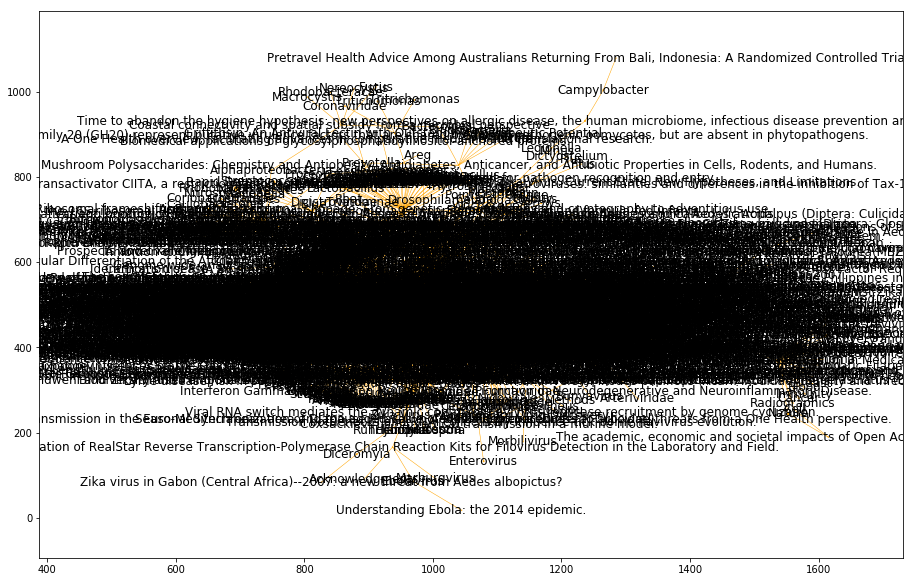

Vascular plant biodiversity of the lower Coppermine River valley and vicinity (Nunavut, Canada): an annotated checklist of an Arctic flora.


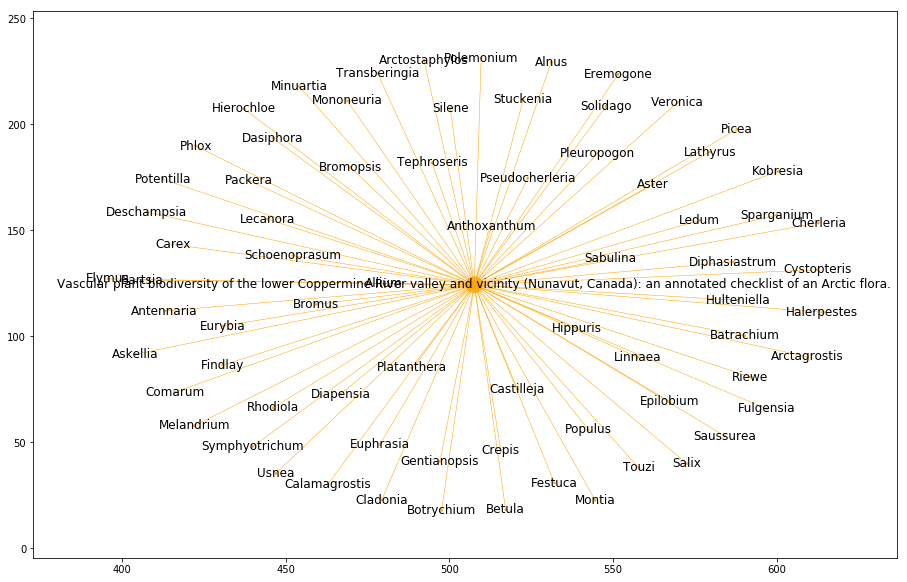

DNA barcodes from four loci provide poor resolution of taxonomic groups in the genus Crataegus.


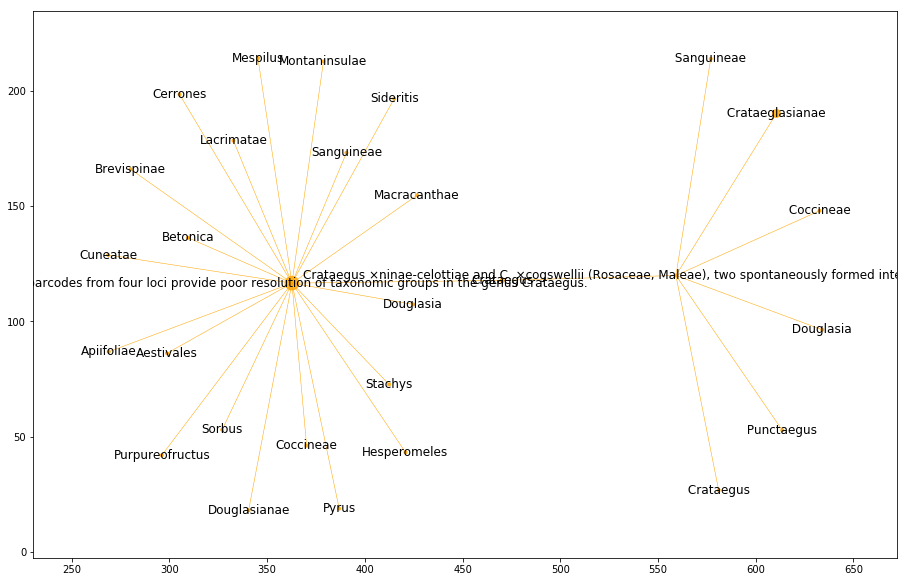

In [58]:
start_with = 0 # pick a number between 1 and 50
how_many = 3 # choose the number of communities you want to plot between 1 and 5. More takes a lot of space in your notebook
subgraphs = sorted(nx.connected_component_subgraphs(B_genus), key=len, reverse=True)[start_with:start_with+how_many]
for sg in subgraphs:
    degreeCent = nx.algorithms.degree_centrality(sg)
    print(max(degreeCent, key=degreeCent.get))
    plotGraph(sg, "orange").show() # choose a color, e.g. red, blue, green, ...

### Your network
The next cell creates a high resolution visualization of the network around your chosen organization/person/location, where related facts, papers they are mentioned in, and also the authors who wrote the papers are visualized. The network will also be saved onto your disk for further usage, like wallpapers, blogging or documentation. You can find it in the MozFest2015 folder.

Don't forget to choose a color!

In [59]:
your_graph = create_subgraph(TRIALS, B_genus, B_genus, your_variable)
save_graph(your_graph, "orange")

NameError: name 'TRIALS' is not defined

## Put a fact into context

In the next cell you can enter an institution/location/person of you interest, and see in which papers they are mentioned, what their titles are. Depending on how busy it was, the list can get a bit long! You can look into the `trialsjournal` folder, open the sbfolder with the ID, and compare it with the acknowledgements section of the paper.

In [ ]:
# your_variable = "Japan"
for ID in B.neighbors(your_variable):
    print ID, TRIALS.get_title(ID)
    print TRIALS.get_ctree(ID).get_section("Acknowledgements")

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.4/dist-packages/matplotlib/pyplot.py'>

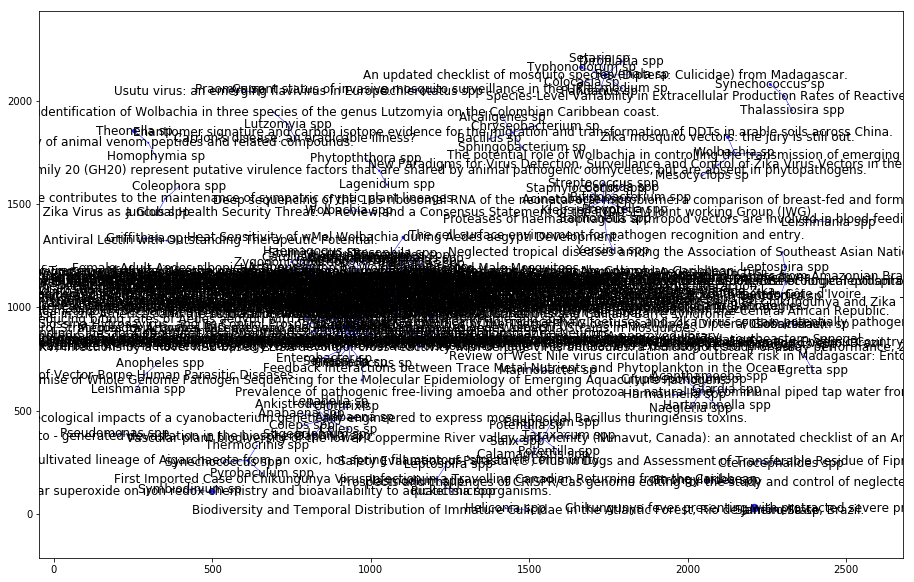

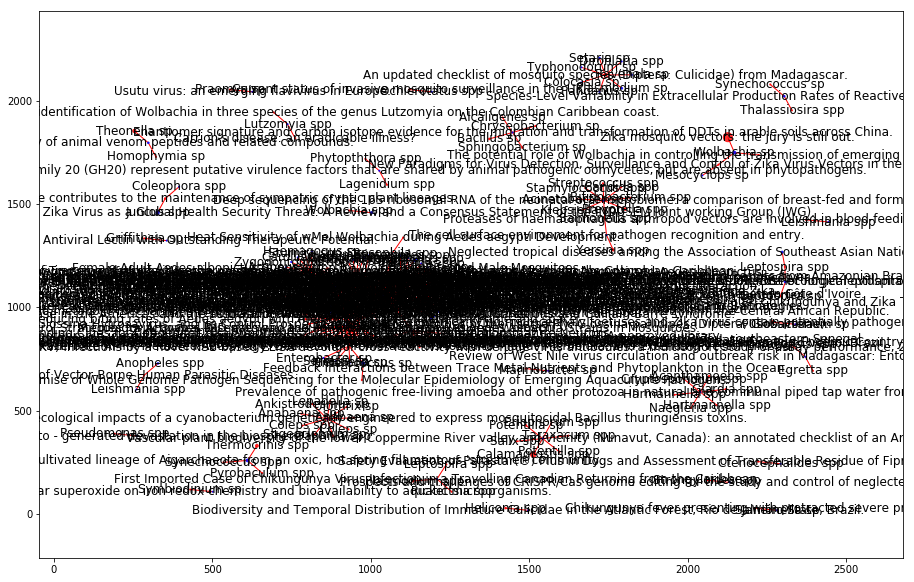

In [62]:
B_genussp, fact_graph, paper_graph, fact_nodes, paper_nodes = create_network(zika, "species", "genussp")
plotGraph(B_genussp)
plotBipartiteGraph(B_genussp)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.4/dist-packages/matplotlib/pyplot.py'>

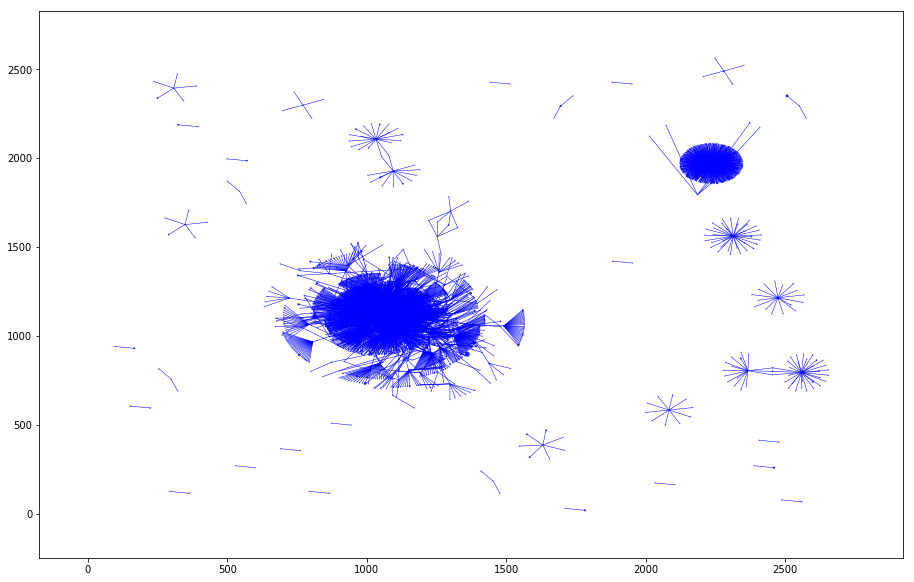

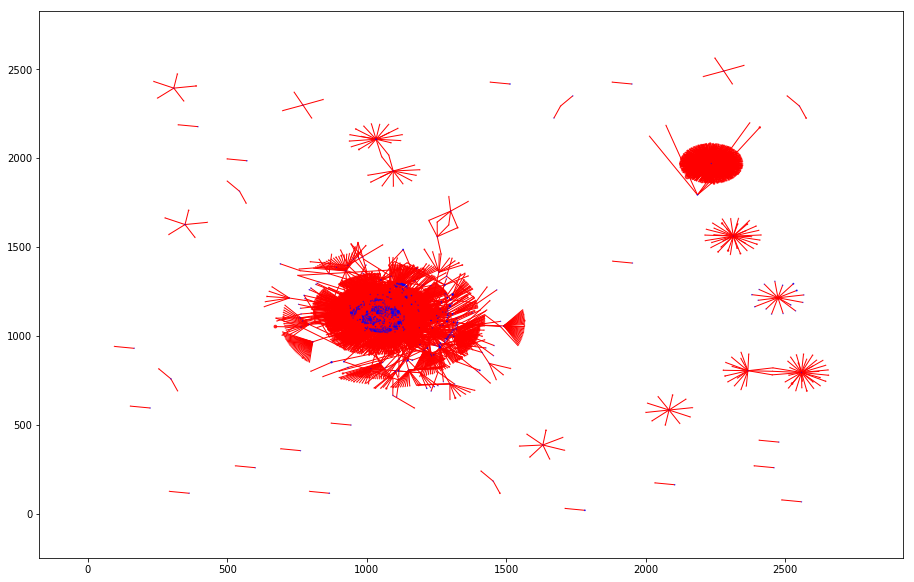

In [63]:
B_binomial, fact_graph, paper_graph, fact_nodes, paper_nodes = create_network(zika, "species", "binomial")
plotGraph(B_binomial)
plotBipartiteGraph(B_binomial)

In [64]:
%%capture
M, fact_graph, paper_graph, fact_nodes, paper_nodes = create_complete_graph(zika)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.4/dist-packages/matplotlib/pyplot.py'>

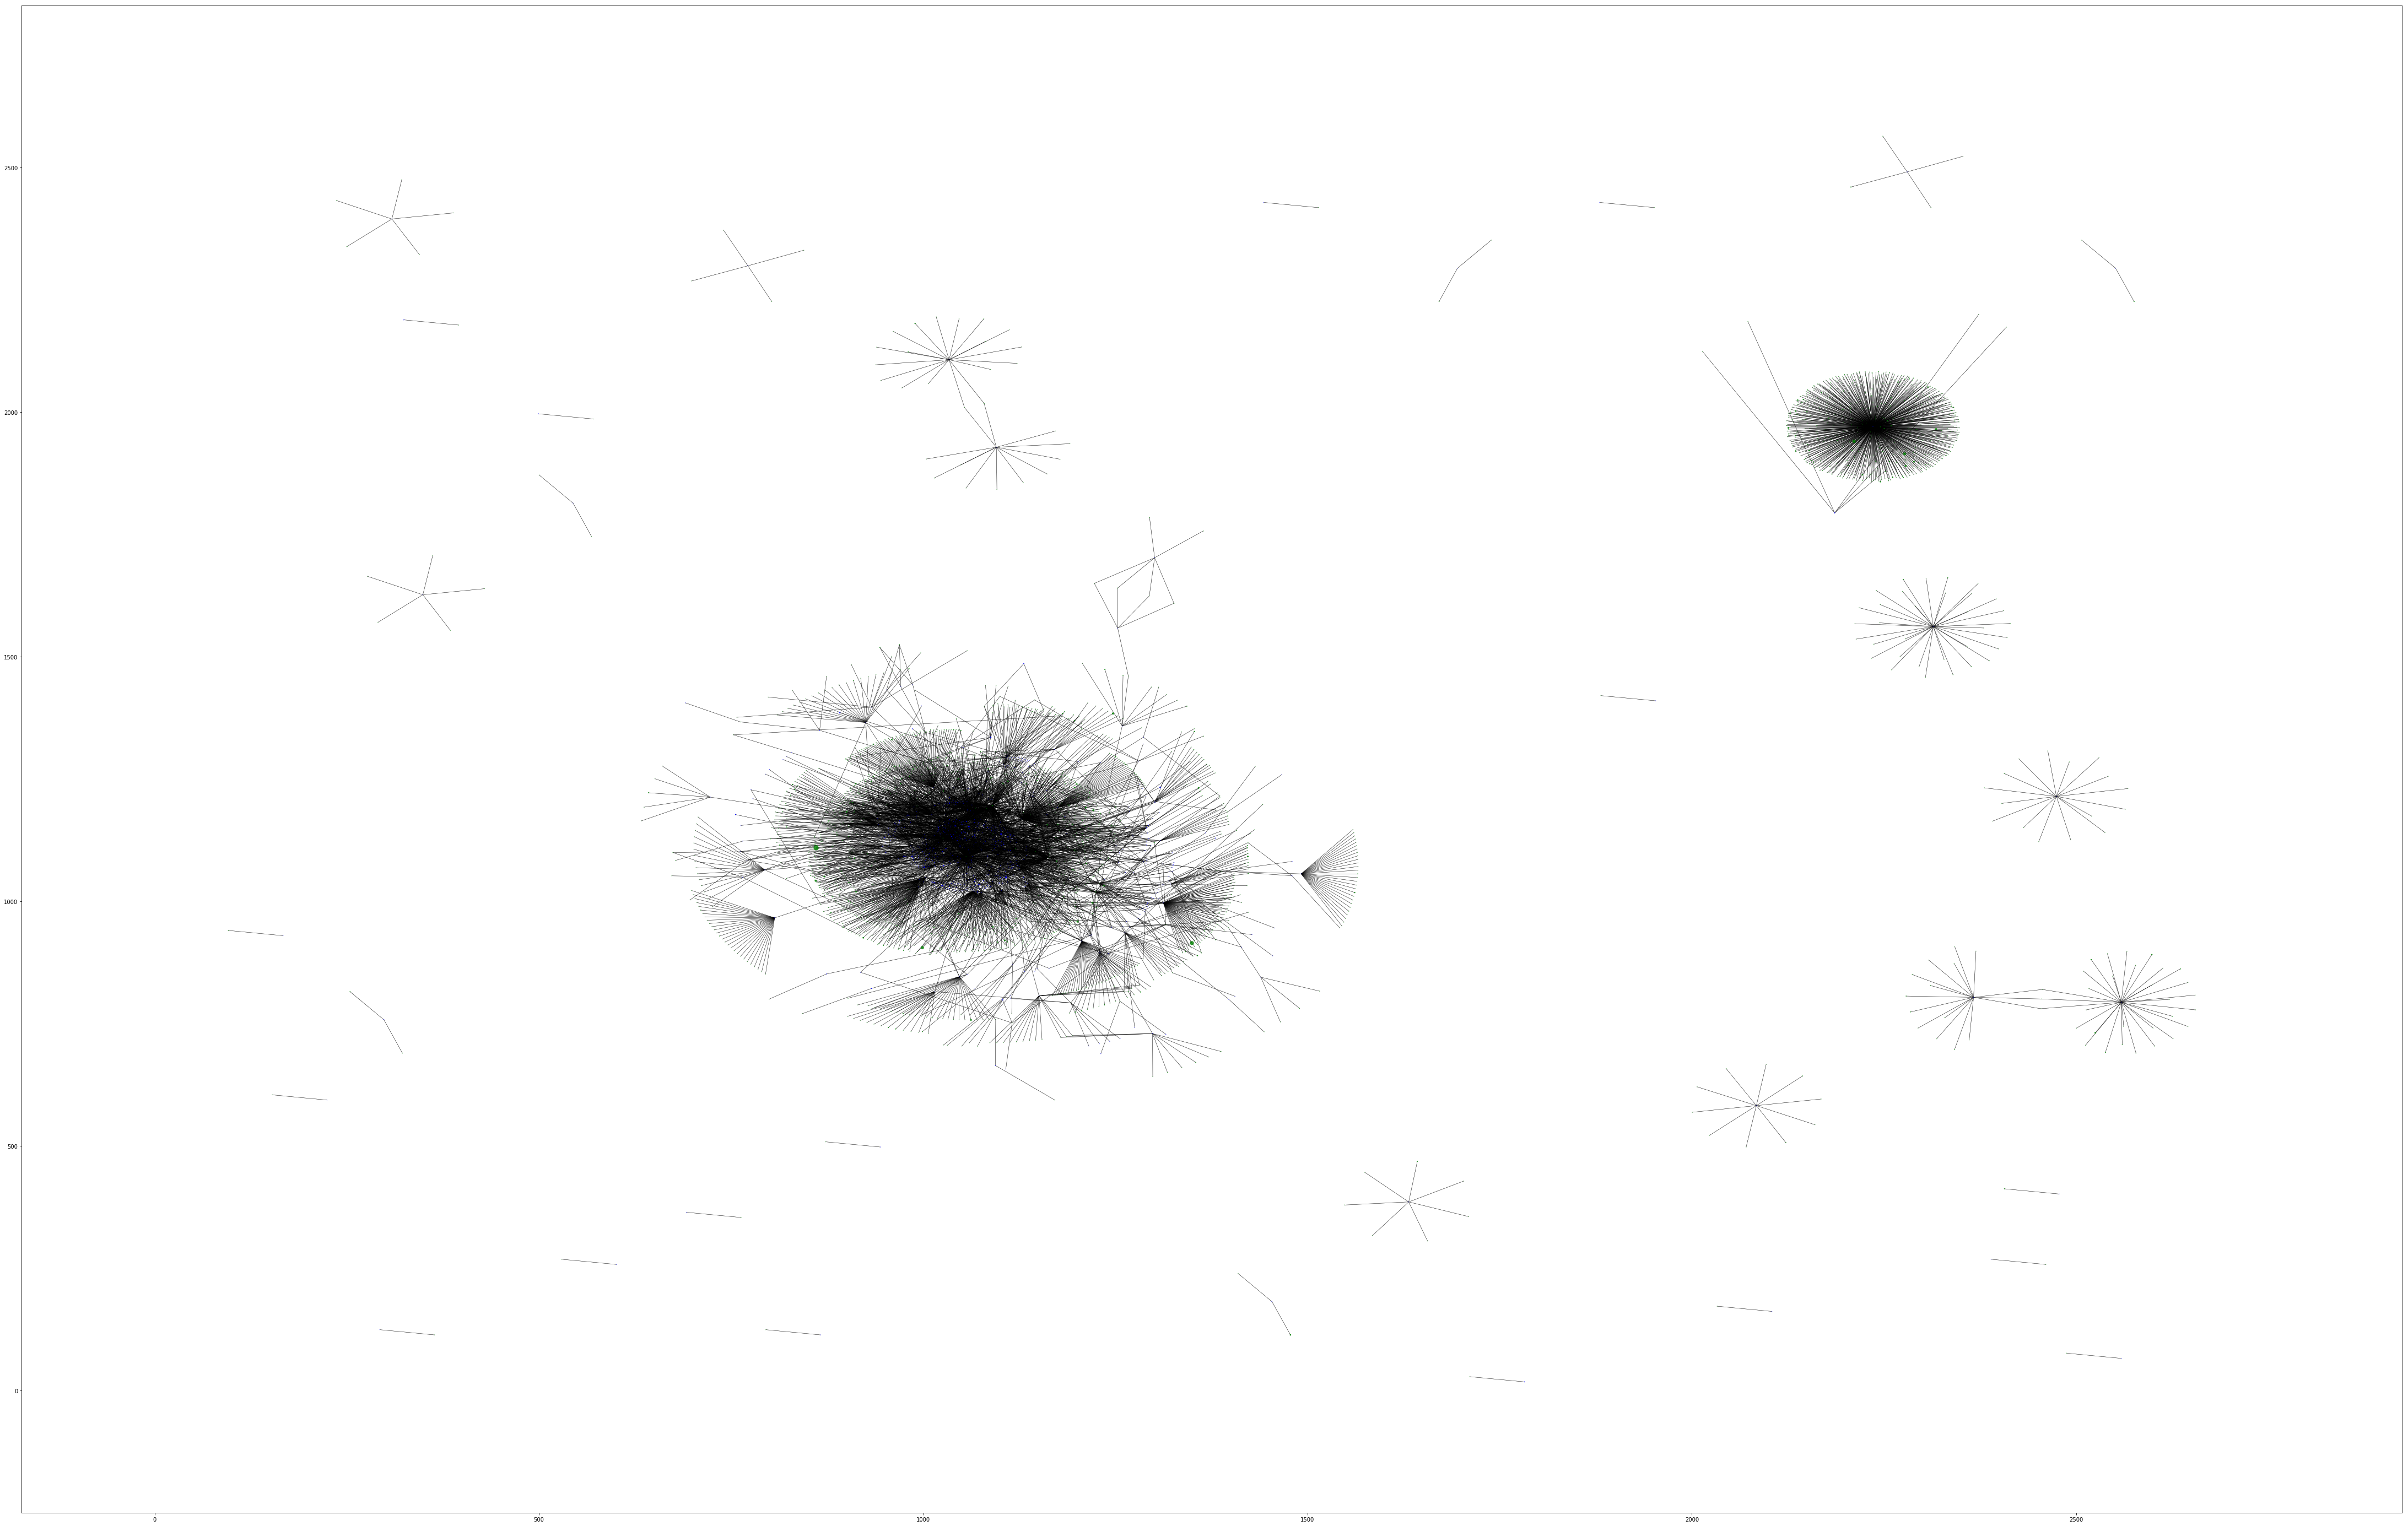

In [65]:
plotMultipartiteGraph(M)